In [181]:
import warnings
warnings.filterwarnings('ignore')

In [182]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from random import shuffle

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [183]:
df = pd.read_csv("./clean_data/fully_merged_data.csv")
df

,sex,age,day,month,MEDHINC_CY,WLTHINDXCY,time_arr,TOTHH_CY,fel_misd
0,M,21,4,0,25336.0,27.0,2310,1309.0,M
1,M,21,4,0,25336.0,27.0,2310,1309.0,M
2,M,24,5,0,25427.0,30.0,16,1359.0,M
3,M,24,5,0,25427.0,30.0,16,1359.0,M
4,M,21,4,0,25336.0,27.0,2310,1309.0,M
...,...,...,...,...,...,...,...,...,...
68073,F,49,2,1,20213.0,20.0,809,3105.0,M
68074,M,22,4,2,30668.0,35.0,1527,3825.0,M
68075,M,22,4,2,30668.0,35.0,1527,3825.0,M
68076,M,22,4,2,30668.0,35.0,1527,3825.0,


In [184]:
# delete empty values

df = df.dropna()
df.head()
df

,sex,age,day,month,MEDHINC_CY,WLTHINDXCY,time_arr,TOTHH_CY,fel_misd
0,M,21,4,0,25336.0,27.0,2310,1309.0,M
1,M,21,4,0,25336.0,27.0,2310,1309.0,M
2,M,24,5,0,25427.0,30.0,16,1359.0,M
3,M,24,5,0,25427.0,30.0,16,1359.0,M
4,M,21,4,0,25336.0,27.0,2310,1309.0,M
...,...,...,...,...,...,...,...,...,...
68073,F,49,2,1,20213.0,20.0,809,3105.0,M
68074,M,22,4,2,30668.0,35.0,1527,3825.0,M
68075,M,22,4,2,30668.0,35.0,1527,3825.0,M
68076,M,22,4,2,30668.0,35.0,1527,3825.0,


In [185]:
# remove null values
arr = df.index[df["fel_misd"] == ' ']
df = df.drop(arr, axis=0)
arr = df.index[df["fel_misd"] == '\xa0']
df = df.drop(arr, axis=0)
df

,sex,age,day,month,MEDHINC_CY,WLTHINDXCY,time_arr,TOTHH_CY,fel_misd
0,M,21,4,0,25336.0,27.0,2310,1309.0,M
1,M,21,4,0,25336.0,27.0,2310,1309.0,M
2,M,24,5,0,25427.0,30.0,16,1359.0,M
3,M,24,5,0,25427.0,30.0,16,1359.0,M
4,M,21,4,0,25336.0,27.0,2310,1309.0,M
...,...,...,...,...,...,...,...,...,...
68072,M,24,6,11,36153.0,34.0,358,2415.0,M
68073,F,49,2,1,20213.0,20.0,809,3105.0,M
68074,M,22,4,2,30668.0,35.0,1527,3825.0,M
68075,M,22,4,2,30668.0,35.0,1527,3825.0,M


In [186]:
# z-score normalize desired columns

from scipy.stats import zscore

need_norm = ["age","MEDHINC_CY", "WLTHINDXCY", "TOTHH_CY", "time_arr"]
norm = df[need_norm].apply(zscore)
norm

,age,MEDHINC_CY,WLTHINDXCY,TOTHH_CY,time_arr
0,-1.007650,-0.795643,-0.502892,-0.442905,1.432511
1,-1.007650,-0.795643,-0.502892,-0.442905,1.432511
2,-0.759528,-0.788811,-0.373469,-0.405740,-1.771927
3,-0.759528,-0.788811,-0.373469,-0.405740,-1.771927
4,-1.007650,-0.795643,-0.502892,-0.442905,1.432511
...,...,...,...,...,...
68072,-0.759528,0.016459,-0.200905,0.379188,-1.294195
68073,1.308155,-1.180260,-0.804879,0.892067,-0.664203
68074,-0.924942,-0.395335,-0.157764,1.427244,0.338756
68075,-0.924942,-0.395335,-0.157764,1.427244,0.338756


In [187]:
df[need_norm] = norm
df

,sex,age,day,month,MEDHINC_CY,WLTHINDXCY,time_arr,TOTHH_CY,fel_misd
0,M,-1.007650,4,0,-0.795643,-0.502892,1.432511,-0.442905,M
1,M,-1.007650,4,0,-0.795643,-0.502892,1.432511,-0.442905,M
2,M,-0.759528,5,0,-0.788811,-0.373469,-1.771927,-0.405740,M
3,M,-0.759528,5,0,-0.788811,-0.373469,-1.771927,-0.405740,M
4,M,-1.007650,4,0,-0.795643,-0.502892,1.432511,-0.442905,M
...,...,...,...,...,...,...,...,...,...
68072,M,-0.759528,6,11,0.016459,-0.200905,-1.294195,0.379188,M
68073,F,1.308155,2,1,-1.180260,-0.804879,-0.664203,0.892067,M
68074,M,-0.924942,4,2,-0.395335,-0.157764,0.338756,1.427244,M
68075,M,-0.924942,4,2,-0.395335,-0.157764,0.338756,1.427244,M


In [ ]:
# removing the imbalanced classes
# temp1 = df[df['fel_misd'] == 2.0]
# temp2 = df[df['fel_misd'] == 1.0]
# df = pd.concat([temp1, temp2])
# df = df.drop(temp)
# temp = df.index[df['fel_misd'] == 1.0].tolist()
# df = df.drop(temp)

In [ ]:
df["fel_misd"].value_counts()

fel_misd
M    46803
F    16407
C     2194
S      240
P       50
Name: count, dtype: int64

In [ ]:
df_pandas_encoded = pd.get_dummies(df, columns=['sex', 'day', 'month'], drop_first=True)
# df_pandas_encoded = pd.get_dummies(df_pandas_encoded, columns=["fel_misd"], drop_first=False)
df_pandas_encoded.head()

,age,MEDHINC_CY,WLTHINDXCY,time_arr,TOTHH_CY,fel_misd,sex_M,sex_U,day_1,day_2,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,-1.007650,-0.795643,-0.502892,1.432511,-0.442905,M,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.007650,-0.795643,-0.502892,1.432511,-0.442905,M,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.759528,-0.788811,-0.373469,-1.771927,-0.405740,M,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.759528,-0.788811,-0.373469,-1.771927,-0.405740,M,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.007650,-0.795643,-0.502892,1.432511,-0.442905,M,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


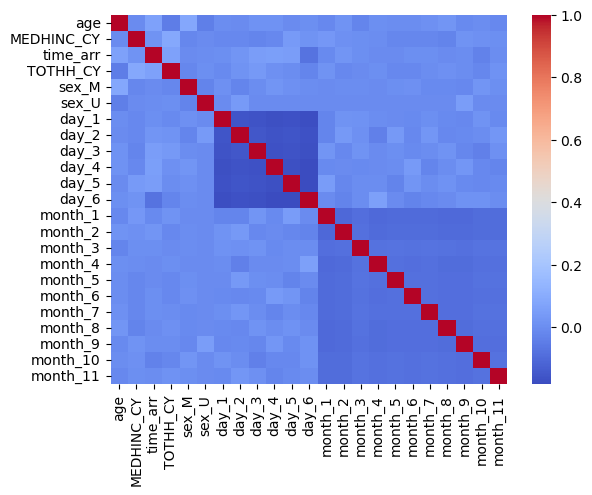

In [ ]:
# HEATMAP:
dataplot = sb.heatmap(df_pandas_encoded.corr(numeric_only=True), cmap='coolwarm')

In [ ]:
m_arr = df_pandas_encoded.index[df_pandas_encoded["fel_misd"] == 'M'].tolist()
f_arr = df_pandas_encoded.index[df_pandas_encoded["fel_misd"] == 'F'].tolist()

shuffle(m_arr)
shuffle(f_arr)

In [ ]:
df_pandas_encoded = df_pandas_encoded.drop(m_arr[0:44000], axis = 0)
df_pandas_encoded = df_pandas_encoded.drop(f_arr[0:14000], axis = 0)
df_pandas_encoded['fel_misd'].value_counts()

fel_misd
M    2803
F    2407
C    2194
S     240
P      50
Name: count, dtype: int64

In [ ]:
df_pandas_encoded = df_pandas_encoded.drop("WLTHINDXCY", axis=1)

In [ ]:
inp = list(df_pandas_encoded.columns)
# oup = ['fel_misd_0.0',
#      'fel_misd_1.0',
#      'fel_misd_2.0',
#      'fel_misd_3.0',
#      'fel_misd_4.0',
#      'fel_misd_5.0']
oup = ["fel_misd"]
for x in oup:
    inp.remove(x)
inp, oup

(['age',
  'MEDHINC_CY',
  'time_arr',
  'TOTHH_CY',
  'sex_M',
  'sex_U',
  'day_1',
  'day_2',
  'day_3',
  'day_4',
  'day_5',
  'day_6',
  'month_1',
  'month_2',
  'month_3',
  'month_4',
  'month_5',
  'month_6',
  'month_7',
  'month_8',
  'month_9',
  'month_10',
  'month_11'],
 ['fel_misd'])

In [ ]:
x,y = df_pandas_encoded[inp], df_pandas_encoded[oup]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, test_size=0.2)

In [ ]:
import itertools
items = ['MEDHINC_CY','age','sex_M', 'day', 'month']
combs = []
for i in range(1, len(items)):
    combs.append(list(set(itertools.combinations(items, i))))

In [ ]:
day_vals = ['day_1',
          'day_2',
          'day_3',
          'day_4',
          'day_5',
          'day_6']

month_vals = ['month_1',
              'month_2',
              'month_3',
              'month_4',
              'month_5',
              'month_6',
              'month_7',
              'month_8',
              'month_9',
              'month_10',
              'month_11']
fel_misd_vals = [ 'fel_misd_1',
                  'fel_misd_2',
                  'fel_misd_3',
                  'fel_misd_4',
                  'fel_misd_5']

best_dict = {"features": [], "score": -2**31}
for k_amt in combs:
    for ind_comb in k_amt:
        comb = list(ind_comb)
        if 'day' in comb:
            comb.remove('day')
            comb += day_vals
        if 'month' in comb:
            comb.remove('month')
            comb += month_vals
        if 'fel_misd' in comb:
            comb.remove('fel_misd')
            comb += fel_misd_vals
        
        x_subset = x_train[comb].values
        cvs = cross_val_score(linear_model.LogisticRegression(multi_class='ovr'), x_subset, y_train)
        
        if cvs.mean() > best_dict["score"]:
            best_dict["features"] = comb
            best_dict["score"] = cvs.mean()
best_dict

{'features': ['MEDHINC_CY',
  'age',
  'sex_M',
  'day_1',
  'day_2',
  'day_3',
  'day_4',
  'day_5',
  'day_6'],
 'score': 0.39821283509342}

In [ ]:
lr = linear_model.LogisticRegression(multi_class="ovr")

In [ ]:
best_dict["features"]

['MEDHINC_CY',
 'age',
 'sex_M',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6']

In [ ]:
x_train = x_train[best_dict["features"]]
x_test = x_test[best_dict["features"]]

lr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
y_pred = lr.predict(x_test)
print(f"Accuracy train: {lr.score(x_train,y_train)}")
print(f"Accuracy Test: {lr.score(x_test,y_test)}")

Accuracy train: 0.40471161657189275
Accuracy Test: 0.40350877192982454


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 86, 142, 230,   0,   0],
       [ 47, 206, 212,   0,   0],
       [ 59, 187, 324,   0,   3],
       [  2,   3,   3,   0,   0],
       [  5,  12,  13,   0,   5]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           C       0.43      0.19      0.26       458
           F       0.37      0.44      0.41       465
           M       0.41      0.57      0.48       573
           P       0.00      0.00      0.00         8
           S       0.62      0.14      0.23        35

    accuracy                           0.40      1539
   macro avg       0.37      0.27      0.28      1539
weighted avg       0.41      0.40      0.38      1539

